In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Audio, clear_output
import random

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
frequencies: dict[str, list[tuple[int, int]]] = {
    "风笛_2喇叭_370_660": [(370, 15), (660, 15)],
    "风笛_2喇叭_311_470": [(311, 15), (470, 15)],
    "风笛_2喇叭_370_622": [(370, 20), (622, 30)],
    "风笛_3喇叭_311_370_470": [(311, 15), (370, 15), (470, 15)],
    "风笛_3喇叭_311_370_494": [(311, 15), (370, 15), (494, 15)],
    "风笛_3喇叭_311_470_622": [(311, 15), (470, 15), (622, 15)],
    "风笛_5喇叭_311_370_470_512_622": [
        (311, 15),
        (370, 15),
        (470, 15),
        (512, 15),
        (622, 15),
    ],
    "电笛_1喇叭_630_1000_1600": [(630, 15), (1000, 15), (1600, 15)],
}


In [3]:
def generate_audio(frequencies, with_error=False, duration=1, sample_rate=44100):
    audio_waveform = np.zeros(duration * sample_rate)
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    errors = []

    for freq, error in frequencies:
        if with_error:
            error_value = random.randint(-error, error)
            errors.append((freq, error_value))
            freq += error_value
        audio_waveform += np.sin(2 * np.pi * freq * time)

    audio_waveform = audio_waveform / np.max(np.abs(audio_waveform))

    return audio_waveform, errors

In [4]:
def play_audio(combo_name, with_error):
    freqs = frequencies[combo_name]
    audio_data, errors = generate_audio(freqs, with_error=with_error)

    plt.figure(figsize=(10, 4))
    plt.plot(audio_data[:10000])
    plt.title(f"音频波形 - {combo_name}")
    plt.xlabel("样本点")
    plt.ylabel("振幅")
    plt.show()

    if with_error:
        print("频率误差信息：")
        for freq, error in errors:
            print(f"原频率: {freq} Hz, 误差: {error} Hz")

    return Audio(audio_data, rate=44100, autoplay=True)


Dropdown(description='猫猫组合:', options=('风笛_2喇叭_370_660', '风笛_2喇叭_311_470', '风笛_2喇叭_370_622', '风笛_3喇叭_311_370_4…

Checkbox(value=False, description='带误差')

Button(description='喵', style=ButtonStyle())

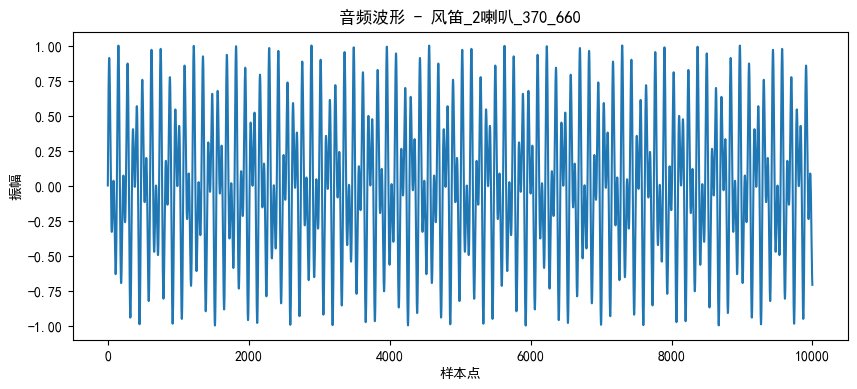

In [5]:
def on_button_click(b):
    clear_output(wait=True)
    display(combo_selector, error_checkbox, play_button)
    audio = play_audio(combo_selector.value, error_checkbox.value)
    display(audio)


combo_selector = widgets.Dropdown(
    options=frequencies.keys(), description="猫猫组合:", disabled=False
)

error_checkbox = widgets.Checkbox(value=False, description="带误差", disabled=False)

play_button = widgets.Button(description="喵")
play_button.on_click(on_button_click)

display(combo_selector, error_checkbox, play_button)